<a href="https://colab.research.google.com/github/gabrieladamasceno/AM_Desafio5/blob/main/Desafio_5_RNN_e_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio 5 - Comparação RN e CNN**

Professor: Cleber Zanchettin

Aluna: Maria Gabriela Lima Damasceno

#Introdução

Dentro os objetivos da atividade destacam-se:
* Preparar dados de imagens em formato csv para treinamento;
* Criar e compilar um modelo simples para classificação de imagens;
* Treinar um modelo de classificação de imagens e observar os resultados;
* Comparar o modelo de RN com CNN.

#Vizualização dos Dados

O dataset é dividido entre treino e validação, definindo os dados e as labels em arquivos de csv diferentes como: `x_train`, `y_train`, `x_valid`, and `y_valid` variables as before. O dataset faz o reconhecimento de algarismos arábicos manuscritos incluindo a variação ilimitada na caligrafia humana presentes nos grandes bancos de dados públicos.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Lendo o Dataset

In [ ]:
import pandas as pd
train_df = pd.read_csv("/content/gdrive/MyDrive/Datasets/archive/csvTrainImages.csv")
valid_df = pd.read_csv("/content/gdrive/MyDrive/Datasets/archive/csvTestImages.csv")

##Explorando o Dataset

In [ ]:
train_df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Extraindo dados das labels

In [ ]:
y_train = pd.read_csv("/content/gdrive/MyDrive/Datasets/archive/csvTrainLabel.csv")
y_valid = pd.read_csv("/content/gdrive/MyDrive/Datasets/archive/csvTestLabel.csv")

In [ ]:
x_train = train_df.values
x_valid = valid_df.values

##Visualizando os Dados

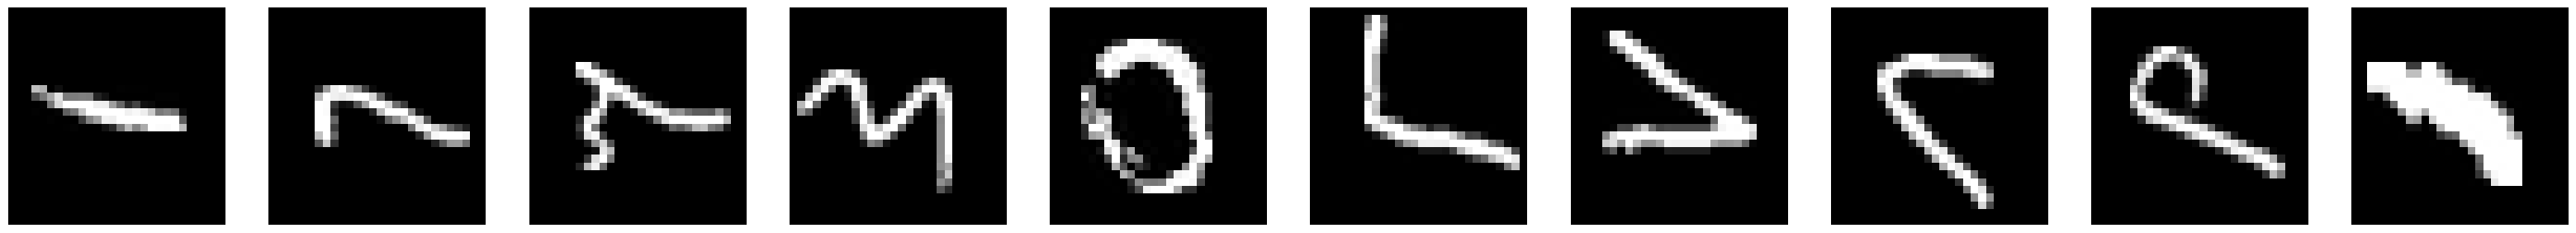

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 10
for i in range(num_images):
    row = x_train[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
plt.show()

## Normalização dos Dados

É possível através das funções min() e max() encontrar os maiores valores dos pixels de cada imagem, onde o 0 seria o pixel mais escuro e o 255 o pixel mais claro.

In [ ]:
x_train.min()

0

In [ ]:
x_train.max()

255

## Categorização das labels

In [ ]:
import tensorflow.keras as keras
num_classes = 10

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x_train)
model = pd.DataFrame(X)
model

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,-0.004083,-0.010411,-0.018426,-0.035815,-0.062133,-0.077294,-0.075695,...,-0.012672,-0.016274,-0.018938,-0.013494,-0.009332,-0.006334,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,-0.004083,-0.010411,-0.018426,-0.035815,-0.062133,-0.077294,-0.075695,...,-0.012672,-0.016274,-0.018938,-0.013494,-0.009332,-0.006334,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-0.004083,-0.010411,-0.018426,-0.035815,-0.062133,-0.077294,-0.075695,...,-0.012672,-0.016274,-0.018938,-0.013494,-0.009332,-0.006334,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,-0.004083,-0.010411,-0.018426,-0.035815,-0.062133,-0.077294,-0.075695,...,-0.012672,-0.016274,-0.018938,-0.013494,-0.009332,-0.006334,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.004083,-0.010411,-0.018426,-0.035815,-0.062133,-0.077294,-0.075695,...,-0.012672,-0.016274,-0.018938,-0.013494,-0.009332,-0.006334,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,0.0,0.0,0.0,-0.004083,-0.010411,-0.018426,-0.035815,-0.062133,-0.077294,-0.075695,...,-0.012672,-0.016274,-0.018938,-0.013494,-0.009332,-0.006334,0.0,0.0,0.0,0.0
59995,0.0,0.0,0.0,-0.004083,-0.010411,-0.018426,-0.035815,15.577816,10.447926,7.482539,...,-0.012672,-0.016274,-0.018938,-0.013494,-0.009332,-0.006334,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,-0.004083,-0.010411,-0.018426,-0.035815,-0.062133,-0.077294,-0.075695,...,-0.012672,-0.016274,-0.018938,-0.013494,-0.009332,-0.006334,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,-0.004083,-0.010411,-0.018426,-0.035815,-0.062133,-0.077294,-0.075695,...,-0.012672,-0.016274,-0.018938,-0.013494,-0.009332,-0.006334,0.0,0.0,0.0,0.0


#Redes Neurais - RN

##Criação do Modelo

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
y_train_encoded = to_categorical(y_train)
y_valid_encoded = to_categorical(y_valid)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # num_classes is the number of unique classes in your target variable

## Sumarização do Modelo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilação do Modelo

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Treinando o Modelo

In [ ]:
model.fit(x_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(x_valid, y_valid_encoded))

Epoch 1/20
1875/1875 [==============================] - 14s 4ms/step - loss: 0.7654 - accuracy: 0.8719 - val_loss: 0.2828 - val_accuracy: 0.9372
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1916 - accuracy: 0.9551 - val_loss: 0.2319 - val_accuracy: 0.9512
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1338 - accuracy: 0.9665 - val_loss: 0.2044 - val_accuracy: 0.9615
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1056 - accuracy: 0.9732 - val_loss: 0.1670 - val_accuracy: 0.9675
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0778 - accuracy: 0.9798 - val_loss: 0.1794 - val_accuracy: 0.9629
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0735 - accuracy: 0.9810 - val_loss: 0.1906 - val_accuracy: 0.9659
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0674 - accuracy: 0.9826 - val_loss: 0.1432 - val_accura

#Redes Neurais Convolucionais - CNN

##Criação do Modelo

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
x_train = x_train / 255
x_valid = x_valid / 255
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)
x_train.shape, x_valid.shape

((59999, 28, 28, 1), (9999, 28, 28, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

##Sumarização do Modelo

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)       

## Compilação do Modelo

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

## Treinando o Modelo

In [ ]:
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
1875/1875 [==============================] - 23s 8ms/step - loss: 0.0756 - accuracy: 0.9803 - val_loss: 0.0499 - val_accuracy: 0.9877
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0366 - accuracy: 0.9910 - val_loss: 0.0352 - val_accuracy: 0.9908
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0291 - accuracy: 0.9931 - val_loss: 0.0438 - val_accuracy: 0.9894
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0234 - accuracy: 0.9943 - val_loss: 0.0469 - val_accuracy: 0.9909
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0216 - accuracy: 0.9950 - val_loss: 0.0526 - val_accuracy: 0.9902
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0183 - accuracy: 0.9957 - val_loss: 0.0430 - val_accuracy: 0.9893
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0148 - accuracy: 0.9964 - val_loss: 0.0420 - val_ac

# Apagando a Memória
Essas funções podem apagar o modelo da memória para que seja possível treiná-lo

In [ ]:
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True)

#Conclusão